# Load Libraries

In [1]:
# Load library
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set up parameters for Basemap
lat0 = 21.8875
lat1 = 25.3125
lon0 = 120.0
lon1 = 122.0125

lats = np.arange(21.8875, 25.3125, 0.0125)
lons = np.arange(120.0, 122.0125, 0.0125)

# Load Data

In [2]:
# CWB station info
stdinfo = pd.read_csv('../examples/data/CWB_station_list_cleaned_20191204.csv')
stdinfo.head()
# CWB QPE
evcwb = pd.read_csv('cwb_qpe_eval_2016_wo_negatives.csv')
# Our QPE
evvtp = pd.read_csv('enclr_test.csv')
# Prepare data for visualization
cwb = pd.merge(evcwb.loc[:,['id','rmse','corr']], stdinfo.loc[:,['id','elevation','lon','lat']], on='id')
print(cwb.head())
vtp = pd.merge(evvtp.loc[:,['id','rmse','corr']], stdinfo.loc[:,['id','elevation','lon','lat']], on='id')
print(vtp.head())

       id      rmse      corr  elevation       lon      lat
0  466880  1.773295  0.775279        9.7  121.4420  24.9976
1  466910  1.826769  0.579438      825.8  121.5297  25.1826
2  466920  1.970767  0.618383        6.3  121.5149  25.0377
3  466930  1.940486  0.536728      607.1  121.5445  25.1621
4  466940  1.739684  0.518058       26.7  121.7405  25.1333
       id      rmse      corr  elevation       lon      lat
0  466880  2.216409  0.554025        9.7  121.4420  24.9976
1  466910  1.724464  0.611159      825.8  121.5297  25.1826
2  466920  2.149729  0.438845        6.3  121.5149  25.0377
3  466930  1.910471  0.616379      607.1  121.5445  25.1621
4  466940  2.339535  0.463284       26.7  121.7405  25.1333


# Mark Stations

C:\Users\tsyo\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if __name__ == '__main__':


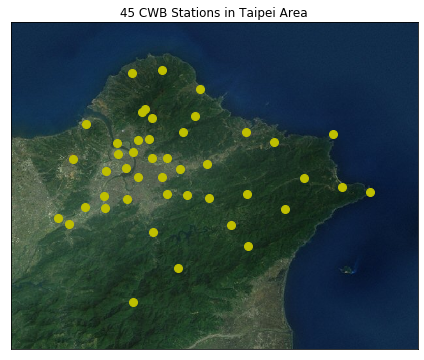

In [13]:
from mpl_toolkits.basemap import Basemap

lat0 = cwb['lat'].min() - 0.1
lat1 = cwb['lat'].max() + 0.1
lon0 = cwb['lon'].min() - 0.1
lon1 = cwb['lon'].max() + 0.1

plt.figure(figsize=(6,6))
m = Basemap(llcrnrlon=lon0, urcrnrlon=lon1, llcrnrlat=lat0, urcrnrlat=lat1)#, resolution='l', epsg=3826)
m.arcgisimage(service='ESRI_Imagery_World_2D', xpixels=800, verbose= False)

nrow, ncol = cwb.shape

for i in range(nrow):
    rec = cwb.iloc[i,:]
    m.plot(rec['lon'], rec['lat'], color='y', marker='o', markersize=8)

plt.title('45 CWB Stations in Taipei Area')
plt.tight_layout()
plt.show()

## Contour Map

C:\Users\tsyo\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  from ipykernel import kernelapp as app


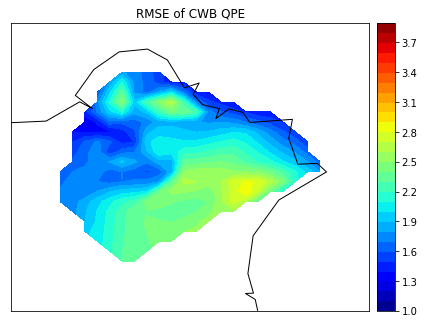

In [25]:
from scipy.interpolate import griddata
# Create the grid space
xtw = np.linspace(lon0,lon1,30)
ytw =  np.linspace(lat0,lat1,30)
Xtw, Ytw = np.meshgrid(xtw,ytw)

# Retrieve the station location and values
lons = cwb['lon']
lats = cwb['lat']
rmse = cwb['rmse']
rmsegrid = griddata((lons, lats), rmse, (Xtw, Ytw), method='linear', rescale=True)

#
plt.figure(figsize=(6,6))                           # Define the figure size
m = Basemap(llcrnrlon=lon0, urcrnrlon=lon1, llcrnrlat=lat0, urcrnrlat=lat1, resolution='i') # Make a map of East Asia
m.contourf(Xtw, Ytw, rmsegrid, levels=np.arange(1,4,0.1), cmap=plt.cm.jet) # Draw a filled-contour plot with the interpolated grid data
m.drawcoastlines()                                  # Draw the coastlines
cb = m.colorbar()                                   # Show colorbar
plt.title('RMSE of CWB QPE')                # Add colobar title
plt.tight_layout()
plt.show()

C:\Users\tsyo\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if __name__ == '__main__':


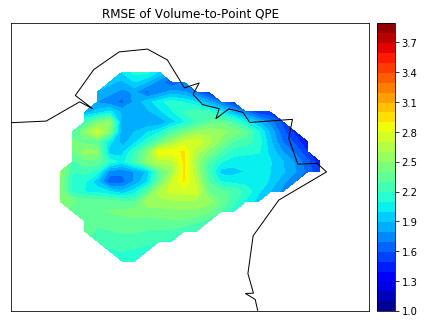

In [26]:
# Retrieve the station location and values
lons = vtp['lon']
lats = vtp['lat']
rmse = vtp['rmse']
rmsegrid = griddata((lons, lats), rmse, (Xtw, Ytw), method='linear', rescale=True)

#
plt.figure(figsize=(6,6))                           # Define the figure size
m = Basemap(llcrnrlon=lon0, urcrnrlon=lon1, llcrnrlat=lat0, urcrnrlat=lat1, resolution='i') # Make a map of East Asia
m.contourf(Xtw, Ytw, rmsegrid, levels=np.arange(1,4,0.1), cmap=plt.cm.jet) # Draw a filled-contour plot with the interpolated grid data
m.drawcoastlines()                                  # Draw the coastlines
cb = m.colorbar()                                   # Show colorbar
plt.title('RMSE of Volume-to-Point QPE')                # Add colobar title
plt.tight_layout()
plt.show()